In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [82]:
vessel_data = pd.read_csv(r"C:\Users\sneha.priya\OneDrive - WiseTech Global Pty Ltd\Desktop\DS\VDT model\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\csv_files\data2_vessel.csv")

In [83]:
vessel_data.head()

,IMO,LENGTH,WIDTH,Gross WT.,Net WT.,BUILT YEAR
0,9046423,146,25,11086.0,5045.0,1993.0
1,9055448,166,27,15183.0,6269.0,1993.0
2,9151307,160,25,13272.0,7249.0,1997.0
3,9160891,135,22,9038.0,4221.0,1998.0
4,9178276,196,30,26047.0,10209.0,NaN


In [84]:
vessel_data['Gross WT.'].describe()

count       321.000000
mean      82771.268212
std       38887.553069
min         140.096000
25%       55487.000000
50%       88856.000000
75%       99543.000000
max      210691.000000
Name: Gross WT., dtype: float64

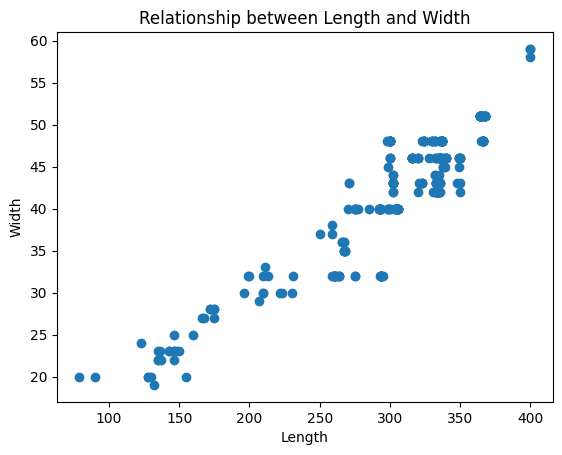

In [85]:
plt.scatter(vessel_data['LENGTH'], vessel_data['WIDTH'])
plt.title('Relationship between Length and Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [86]:
vessel_data['LENGTH'].describe()

count    323.000000
mean     299.164087
std       61.070022
min       79.000000
25%      292.000000
50%      306.000000
75%      336.000000
max      400.000000
Name: LENGTH, dtype: float64

Clustering for vessel sizee

In [87]:
vessel_data = vessel_data.dropna(subset=['Gross WT.'])


In [88]:
X = vessel_data[['LENGTH','Gross WT.']]
X.isna().sum()

LENGTH       0
Gross WT.    0
dtype: int64

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).round(2)
# nan_mask =np.isnan(X_scaled)
# num_nans = np.sum(nan_mask)
# num_nans

In [90]:
X_scaled[61:90]

array([[ 0.63,  0.39],
       [ 0.63,  0.39],
       [ 0.63,  0.39],
       [ 0.63,  0.39],
       [ 0.6 ,  0.41],
       [ 0.58,  0.41],
       [ 0.6 ,  0.41],
       [ 0.6 ,  0.43],
       [-0.59, -1.05],
       [-0.11, -0.73],
       [-0.66, -1.06],
       [ 0.57,  0.28],
       [ 0.57,  0.28],
       [-0.11, -0.28],
       [-0.13, -0.28],
       [-0.11, -0.28],
       [ 0.27,  0.1 ],
       [ 0.27,  0.1 ],
       [ 0.27,  0.1 ],
       [ 0.27,  0.11],
       [ 0.05, -0.21],
       [-0.64, -1.1 ],
       [-0.64, -1.1 ],
       [-0.38, -0.43],
       [-1.14, -1.2 ],
       [-0.11, -0.28],
       [-0.11, -0.28],
       [-0.11, -0.28],
       [-0.1 , -0.74]])

In [91]:
kmeans = KMeans(n_clusters=3,random_state=42)
vessel_data['CLUSTER'] = kmeans.fit_predict(X_scaled)

c:\Users\sneha.priya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
cluster_counts = vessel_data['CLUSTER'].value_counts().sort_index()
cluster_counts

0    134
1     40
2    147
Name: CLUSTER, dtype: int64

In [93]:
# Assign descriptive labels to clusters based on their centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
sorted_idx = centroids[:, 0].argsort()  # Sort clusters by LENGTH
size_labels = ['Small', 'Medium', 'Large']
label_mapping = dict(zip(sorted_idx, size_labels))

In [94]:
vessel_data['VESSEL_CATEGORY'] = vessel_data['CLUSTER'].map(label_mapping)
label_mapping

{1: 'Small', 0: 'Medium', 2: 'Large'}

In [95]:
vessel_data.head()

,IMO,LENGTH,WIDTH,Gross WT.,Net WT.,BUILT YEAR,CLUSTER,VESSEL_CATEGORY
0,9046423,146,25,11086.0,5045.0,1993.0,1,Small
1,9055448,166,27,15183.0,6269.0,1993.0,1,Small
2,9151307,160,25,13272.0,7249.0,1997.0,1,Small
3,9160891,135,22,9038.0,4221.0,1998.0,1,Small
4,9178276,196,30,26047.0,10209.0,NaN,1,Small


In [96]:
vessel_data.columns

Index(['IMO', 'LENGTH', 'WIDTH', 'Gross WT.', 'Net WT.', 'BUILT YEAR',
       'CLUSTER', 'VESSEL_CATEGORY'],
      dtype='object')

In [97]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [98]:
# Only calculate if there are clusters identified (DBSCAN may find everything as noise, resulting in no clusters)
if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN found no clusters or a single cluster.")

DBSCAN Silhouette Score: 0.40947255721987347


In [99]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agg_clusters = agglomerative.fit_predict(X_scaled)


In [100]:
agg_silhouette = silhouette_score(X_scaled, agg_clusters)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)

Agglomerative Clustering Silhouette Score: 0.5692190780232026


In [101]:
shipment_cleaned = pd.read_csv(r"C:\Users\sneha.priya\OneDrive - WiseTech Global Pty Ltd\Desktop\DS\VDT model\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\csv_files\csv files\shipment_cleaned.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sneha.priya\\OneDrive - WiseTech Global Pty Ltd\\Desktop\\DS\\VDT model\\DS Interview Assignment\\DS Interview Assignment\\Data for Assignment 1\\csv_files\\csv files\\shipment_cleaned.csv'

In [ ]:
vessel_data_filtered = vessel_data[['IMO', 'LENGTH', 'CLUSTER', 'VESSEL_CATEGORY']]

In [ ]:
shipment_vessel = shipment_cleaned.merge(vessel_data_filtered,how='inner', on = 'IMO')

In [ ]:
shipment_cleaned.columns

Index(['Unnamed: 0', 'VESSEL', 'IMO', 'ORIGIN_PORT', 'DESTINATION_PORT',
       'ARRIVAL_TIME', 'GATEOUT_TIME', 'HAZMAT', 'IMPORT_DWELL',
       'IMPORT_DWELL_SCALED', 'RF', 'Container_Size', 'IS_WEEKEND'],
      dtype='object')

In [ ]:
shipment_vessel = shipment_vessel.drop_duplicates()

In [ ]:
shipment_vessel.shape

(982, 16)

In [ ]:
shipment_vessel.head()

,Unnamed: 0,VESSEL,IMO,ORIGIN_PORT,DESTINATION_PORT,ARRIVAL_TIME,GATEOUT_TIME,HAZMAT,IMPORT_DWELL,IMPORT_DWELL_SCALED,RF,Container_Size,IS_WEEKEND,LENGTH,CLUSTER,VESSEL_CATEGORY
0,0,BELLAVIA,9290440,NAGOYA,TACOMA,2019-08-28 06:30:00,2019-08-29 13:11:00,0,30.683333,5.581219,0,0,0,294,0,Medium
1,1,BELLAVIA,9290440,TOKYO,TACOMA,2019-08-28 06:30:00,2019-08-30 14:30:00,0,56.000000,7.200192,0,0,0,294,0,Medium
2,55,BELLAVIA,9290440,TOKYO,TACOMA,2019-08-28 06:30:00,2019-09-03 09:46:00,0,147.266667,10.409747,0,0,0,294,0,Medium
3,56,BELLAVIA,9290440,TOKYO,TACOMA,2019-08-28 06:30:00,2019-08-29 10:03:00,0,27.550000,5.317675,0,0,0,294,0,Medium
4,57,BELLAVIA,9290440,TOKYO,TACOMA,2019-08-28 06:30:00,2019-08-29 10:38:00,0,28.133333,5.368350,0,0,0,294,0,Medium


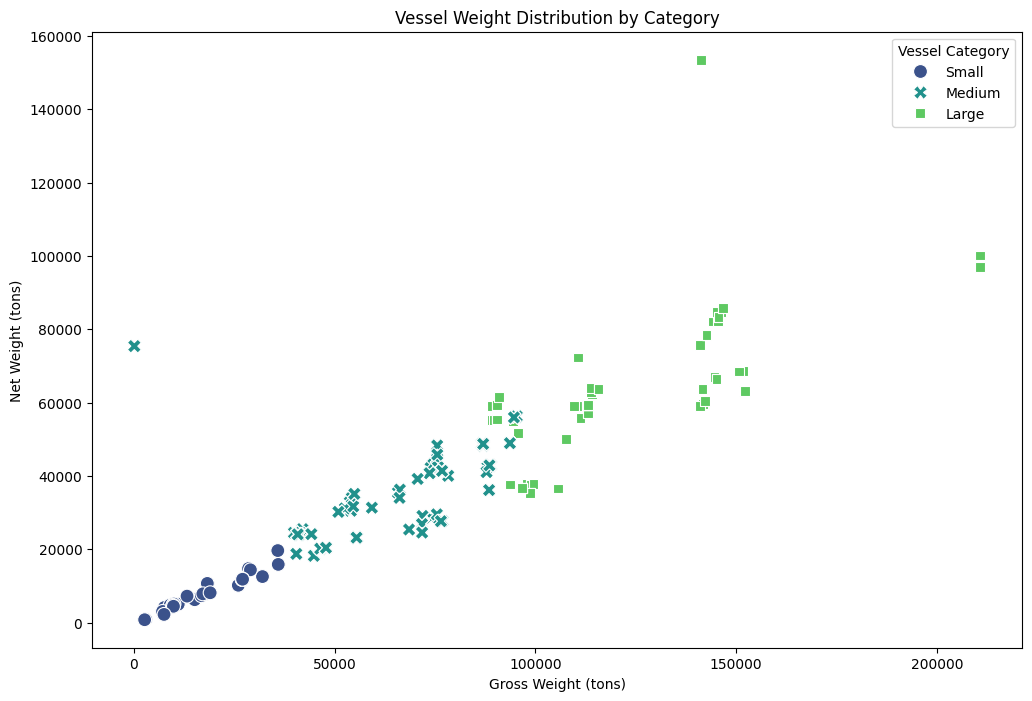

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# shipment_vessel['CLUSTER'] = shipment_vessel['CLUSTER'].astype(str)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Gross WT.', y='Net WT.', hue='VESSEL_CATEGORY', data=vessel_data,
                palette='viridis', style='VESSEL_CATEGORY', s=100)

plt.title('Vessel Weight Distribution by Category')
plt.xlabel('Gross Weight (tons)')
plt.ylabel('Net Weight (tons)')
plt.legend(title='Vessel Category')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, vessel_data['CLUSTER'])
silhouette_avg

0.5225795203179584

In [ ]:
vessel_data['CLUSTER'].value_counts()

2    147
0    134
1     40
Name: CLUSTER, dtype: int64

In [ ]:
shipment_vessel.columns

Index(['Unnamed: 0', 'VESSEL', 'IMO', 'ORIGIN_PORT', 'DESTINATION_PORT',
       'ARRIVAL_TIME', 'GATEOUT_TIME', 'HAZMAT', 'IMPORT_DWELL',
       'IMPORT_DWELL_SCALED', 'RF', 'Container_Size', 'IS_WEEKEND', 'LENGTH',
       'CLUSTER', 'VESSEL_CATEGORY'],
      dtype='object')

In [ ]:
shipment_vessel.to_csv('shipment_vessel.csv')